# Sailboat Simulation

## Analysis of Environment and Results

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# 1 - Calculations for Velocity and Reward

def vel(theta, theta_0=0, theta_dead=np.pi / 12):
    return 1 - np.exp(-(theta - theta_0) ** 2 / theta_dead)

def rew(theta, theta_0=0, theta_dead=np.pi / 12):
    return vel(theta, theta_0, theta_dead) * np.cos(theta)

In [3]:
theta_list_neg = [(np.pi/2)/x for x in range(-1000,0)]
theta_list_pos = [(np.pi/2)/x for x in range(1,1001)]
theta_list = theta_list_neg + theta_list_pos
theta_list.sort()
vel_list = [vel(theta) for theta in theta_list]
rew_list = [rew(theta) for theta in theta_list]


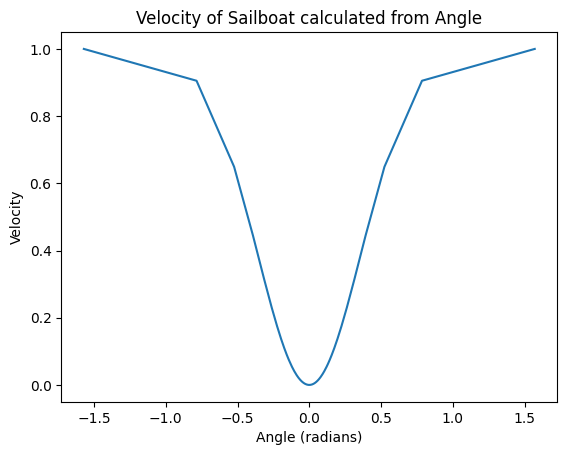

In [4]:
plt.plot(theta_list, vel_list)
plt.title("Velocity of Sailboat calculated from Angle")
plt.xlabel("Angle (radians)")
plt.ylabel("Velocity")
plt.show()

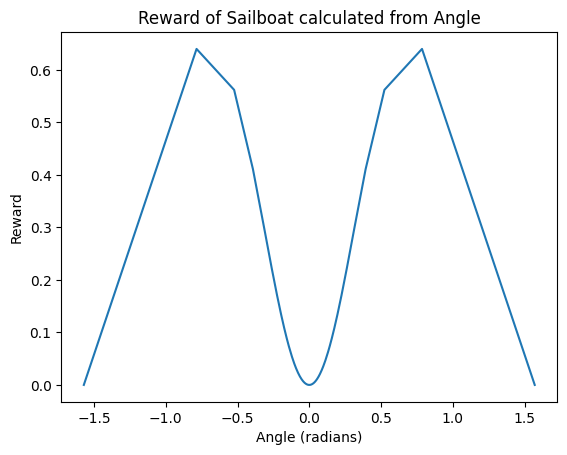

In [5]:
plt.plot(theta_list, rew_list)
plt.title("Reward of Sailboat calculated from Angle")
plt.xlabel("Angle (radians)")
plt.ylabel("Reward")
plt.show()

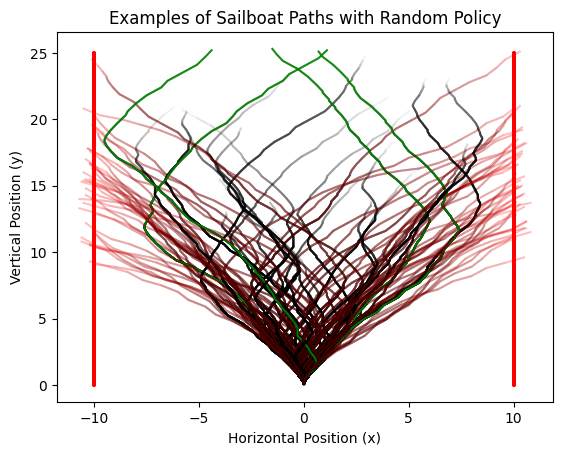

In [6]:
action_list = [-0.1,0.1]
# Applies 100 random actions for N repeats and plots each resultant path from fixed start position
for repeat in range(0,100):
    x = 0 #np.round(np.random.randint(-9.9, 9.9),1)
    y = 0
    angle = 0
    
    x_list=[]
    y_list=[]
    for i in range(0,100):
        a = random.choice(action_list)
        angle+=a
        x += np.round((vel(angle + a) * np.sin(angle + a)),1) # Round x to 2dp
        y += np.round((vel(angle + a) * np.cos(angle + a)),1) # Round y to 2dp

        x_list.append(x)
        y_list.append(y)

        if np.abs(x)>=10:
            plt.plot(x_list,y_list,'r',alpha=0.25)
            break
        elif np.abs(y)>25:
            plt.plot(x_list,y_list,'g',alpha=0.9)
            break
        elif np.abs(y)<0:
            plt.plot(x_list,y_list,'r',alpha=0)
            break
        else:
            plt.plot(x_list,y_list,'k',alpha=0.05)
        
    
    plt.plot([10,10],[0,25],'r')
    plt.plot([-10,-10],[0,25],'r')
plt.title("Examples of Sailboat Paths with Random Policy")
plt.xlabel("Horizontal Position (x)")
plt.ylabel("Vertical Position (y)")
plt.show()

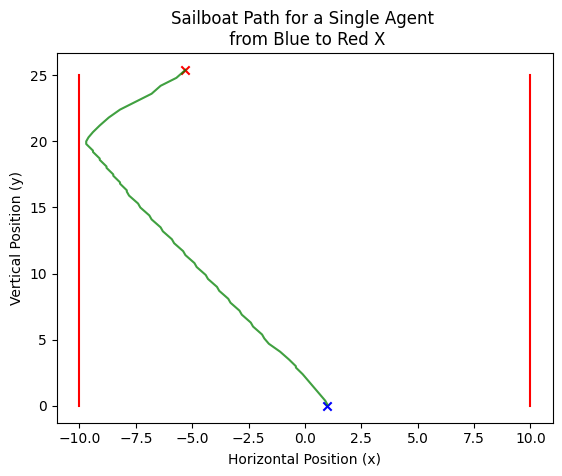

In [7]:


# Re-applies actions made by agent to observe path
x = 1
y = 0
plt.scatter(x,y,marker='x', color='b')
angle=0
action_list = [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]

x_list=[]
y_list=[]
for action in action_list:
    a = [-0.1,0.1][action]
    angle+=a
    #print(x,"|", y, "|", angle)
    x += np.round((vel(angle + a) * np.sin(angle + a)),1) # Round x to 2dp
    y += np.round((vel(angle + a) * np.cos(angle + a)),1) # Round y to 2dp

    x_list.append(x)
    y_list.append(y)

if np.abs(x_list[-1])>=10:
    plt.plot(x_list,y_list,'r',alpha=0.75)
elif np.abs(y_list[-1])>25:
    plt.plot(x_list,y_list,'g',alpha=0.75)
elif np.abs(y_list[-1])<0:
    plt.plot(x_list,y_list,'r',alpha=0.75)
else:
    plt.plot(x_list,y_list,'k',alpha=0.75)
    
plt.scatter(x_list[-1],y_list[-1],marker='x', color='r')
plt.plot([10,10],[0,25],'r')
plt.plot([-10,-10],[0,25],'r')
plt.title("Sailboat Path for a Single Agent \n from Blue to Red X")
plt.xlabel("Horizontal Position (x)")
plt.ylabel("Vertical Position (y)")
plt.show()

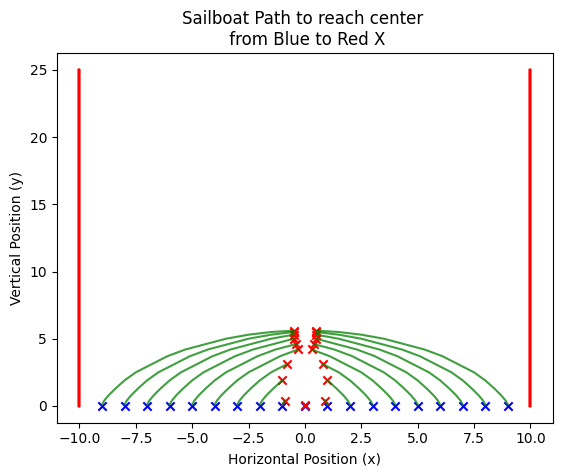

In [8]:
# Re-applies actions made by agent to observe path
for x in range(-9,10):
    y = 0
    plt.scatter(x,y,marker='x', color='b')
    angle=0
    if x < 0:
        action_list = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
    else:
        action_list = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

    x_list=[]
    y_list=[]
    center_reached = False
    for action in action_list:
        a = [-0.1,0.1][action]
        angle+=a
        #print(x,"|", y, "|", angle)
        x += np.round((vel(angle + a) * np.sin(angle + a)),1) # Round x to 2dp
        y += np.round((vel(angle + a) * np.cos(angle + a)),1) # Round y to 2dp

        x_list.append(x)
        y_list.append(y)

        if np.abs(x)<1:
            plt.plot(x_list,y_list,'g',alpha=0.75)
            center_reached = True
            break

    if not center_reached:
        plt.plot(x_list,y_list,'k',alpha=0.75)
        
    plt.scatter(x_list[-1],y_list[-1],marker='x', color='r')
    plt.plot([10,10],[0,25],'r')
    plt.plot([-10,-10],[0,25],'r')
    plt.title("Sailboat Path to reach center \n from Blue to Red X")
    plt.xlabel("Horizontal Position (x)")
    plt.ylabel("Vertical Position (y)")
plt.show()

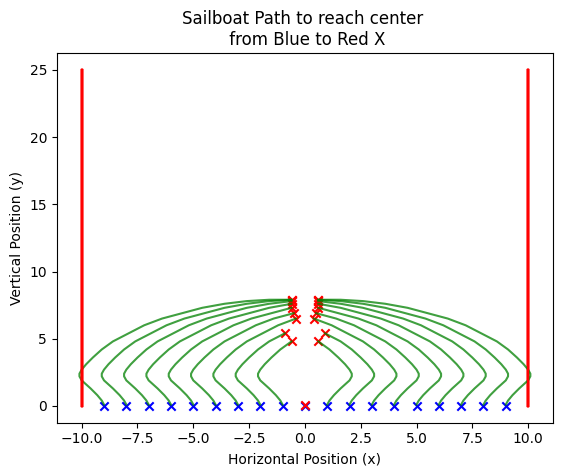

In [9]:
# Re-applies actions made by agent to observe path
for x in range(-9,10):
    y = 0
    plt.scatter(x,y,marker='x', color='b')
    angle=0
    if x < 0:
        action_list = [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
    else:
        action_list = [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


    x_list=[]
    y_list=[]
    center_reached = False
    for action in action_list:
        a = [-0.1,0.1][action]
        angle+=a
        #print(x,"|", y, "|", angle)
        x += np.round((vel(angle + a) * np.sin(angle + a)),1) # Round x to 2dp
        y += np.round((vel(angle + a) * np.cos(angle + a)),1) # Round y to 2dp

        x_list.append(x)
        y_list.append(y)

        if np.abs(x)<1:
            plt.plot(x_list,y_list,'g',alpha=0.75)
            center_reached = True
            break

    if not center_reached:
        plt.plot(x_list,y_list,'k',alpha=0.75)
        
    plt.scatter(x_list[-1],y_list[-1],marker='x', color='r')
    plt.plot([10,10],[0,25],'r')
    plt.plot([-10,-10],[0,25],'r')
    plt.title("Sailboat Path to reach center \n from Blue to Red X")
    plt.xlabel("Horizontal Position (x)")
    plt.ylabel("Vertical Position (y)")
plt.show()

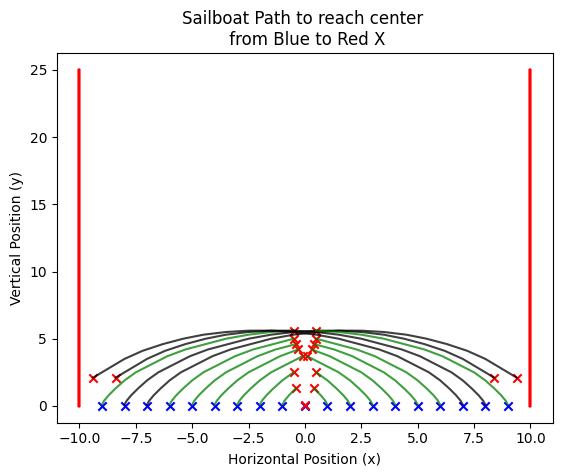

In [10]:
# Re-applies actions made by agent to observe path
for x in range(-9,10):
    y = 0
    plt.scatter(x,y,marker='x', color='b')
    angle=0
    if x < 0:
        action_list = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
    else:
        action_list = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

    x_list=[]
    y_list=[]
    center_reached = False
    for action in action_list:
        a = [-0.1,0.1][action]
        angle+=a
        #print(x,"|", y, "|", angle)
        x += np.round((vel(angle + a) * np.sin(angle + a)),1) # Round x to 2dp
        y += np.round((vel(angle + a) * np.cos(angle + a)),1) # Round y to 2dp

        x_list.append(x)
        y_list.append(y)

        if np.abs(x)<0.5:
            plt.plot(x_list,y_list,'g',alpha=0.75)
            center_reached = True
            break

    if not center_reached:
        plt.plot(x_list,y_list,'k',alpha=0.75)
        
    plt.scatter(x_list[-1],y_list[-1],marker='x', color='r')
    plt.plot([10,10],[0,25],'r')
    plt.plot([-10,-10],[0,25],'r')
    plt.title("Sailboat Path to reach center \n from Blue to Red X")
    plt.xlabel("Horizontal Position (x)")
    plt.ylabel("Vertical Position (y)")
plt.show()

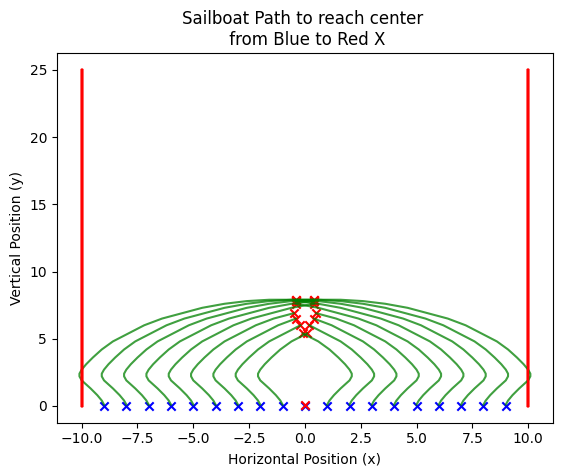

In [11]:
# Re-applies actions made by agent to observe path
for x in range(-9,10):
    y = 0
    plt.scatter(x,y,marker='x', color='b')
    angle=0
    if x < 0:
        action_list = [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
    else:
        action_list = [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


    x_list=[]
    y_list=[]
    center_reached = False
    for action in action_list:
        a = [-0.1,0.1][action]
        angle+=a
        #print(x,"|", y, "|", angle)
        x += np.round((vel(angle + a) * np.sin(angle + a)),1) # Round x to 2dp
        y += np.round((vel(angle + a) * np.cos(angle + a)),1) # Round y to 2dp

        x_list.append(x)
        y_list.append(y)

        if np.abs(x)<0.5:
            plt.plot(x_list,y_list,'g',alpha=0.75)
            center_reached = True
            break

    if not center_reached:
        plt.plot(x_list,y_list,'k',alpha=0.75)
        
    plt.scatter(x_list[-1],y_list[-1],marker='x', color='r')
    plt.plot([10,10],[0,25],'r')
    plt.plot([-10,-10],[0,25],'r')
    plt.title("Sailboat Path to reach center \n from Blue to Red X")
    plt.xlabel("Horizontal Position (x)")
    plt.ylabel("Vertical Position (y)")
plt.show()

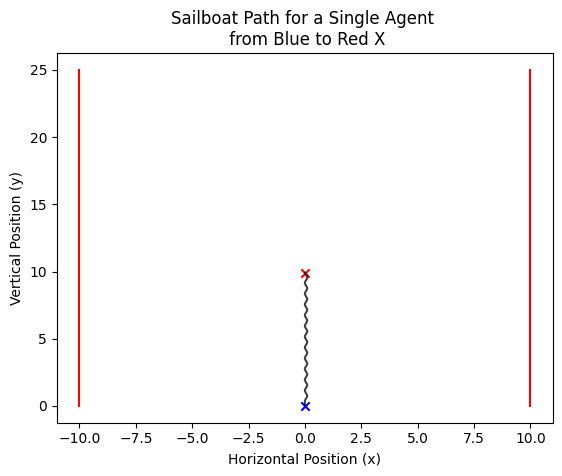

In [12]:


# Re-applies actions made by agent to observe path
x = 0
y = 0
plt.scatter(x,y,marker='x', color='b')
angle=0
action_list = [1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 
               0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]




x_list=[]
y_list=[]
for action in action_list:
    a = [-0.1,0.1][action]
    angle+=a
    #print(x,"|", y, "|", angle)
    x += np.round((vel(angle + a) * np.sin(angle + a)),1) # Round x to 2dp
    y += np.round((vel(angle + a) * np.cos(angle + a)),1) # Round y to 2dp

    x_list.append(x)
    y_list.append(y)

if np.abs(x_list[-1])>=10:
    plt.plot(x_list,y_list,'r',alpha=0.75)
elif np.abs(y_list[-1])>25:
    plt.plot(x_list,y_list,'g',alpha=0.75)
elif np.abs(y_list[-1])<0:
    plt.plot(x_list,y_list,'r',alpha=0.75)
else:
    plt.plot(x_list,y_list,'k',alpha=0.75)
    
plt.scatter(x_list[-1],y_list[-1],marker='x', color='r')
plt.plot([10,10],[0,25],'r')
plt.plot([-10,-10],[0,25],'r')
plt.title("Sailboat Path for a Single Agent \n from Blue to Red X")
plt.xlabel("Horizontal Position (x)")
plt.ylabel("Vertical Position (y)")
plt.show()

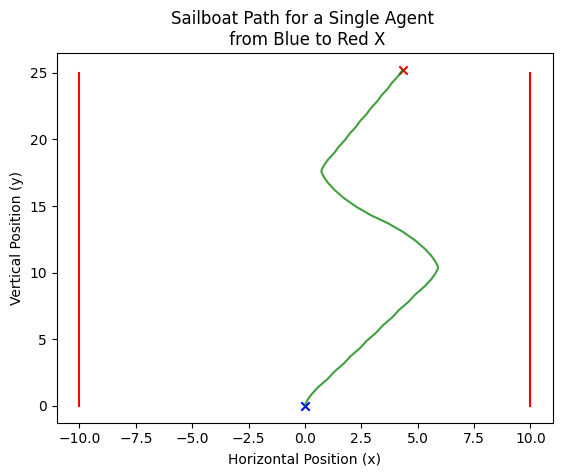

In [16]:


# Re-applies actions made by agent to observe path
x = 0
y = 0
plt.scatter(x,y,marker='x', color='b')
angle = 0
# 10k episodes, 0.1 instr ration -> 9 instr for 18k episodes, 2k episodes for final long-term gaol
# action_list_10k_good =  [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
# action_list_10k_zero = [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
#action_list_10k_bad = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]

action_list = [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

x_list=[]
y_list=[]
for action in action_list:
    a = [-0.1,0.1][action]
    
    #print(x,"|", y, "|", angle)
    x += np.round((vel(angle + a) * np.sin(angle + a)),4) # Round x to 2dp
    y += np.round((vel(angle + a) * np.cos(angle + a)),4) # Round y to 2dp
    angle=np.around(angle+a,1)
    # if (x > 3)&(x<5):
    #     print("---")
    #     print("{:0.4f}".format(x),"|", "{:0.4f}".format(y), "|", "{:0.1f}".format(angle))
    x_list.append(x)
    y_list.append(y)

if np.abs(x_list[-1])>=10:
    plt.plot(x_list,y_list,'r',alpha=0.75)
elif np.abs(y_list[-1])>=24:
    plt.plot(x_list,y_list,'g',alpha=0.75)
elif np.abs(y_list[-1])<0:
    plt.plot(x_list,y_list,'r',alpha=0.75)
else:
    plt.plot(x_list,y_list,'k',alpha=0.75)
    
plt.scatter(x_list[-1],y_list[-1],marker='x', color='r')
plt.plot([10,10],[0,25],'r')
plt.plot([-10,-10],[0,25],'r')
plt.title("Sailboat Path for a Single Agent \n from Blue to Red X")
plt.xlabel("Horizontal Position (x)")
plt.ylabel("Vertical Position (y)")
plt.show()
#print(x,"-",y,"-",angle)

------------------
-0.0281
------------------
-0.0525
------------------
-0.2306
------------------
-0.5255
------------------
-0.5536
------------------
-0.5573
------------------
-0.7354
------------------
-1.0303
------------------
-1.4522
------------------
-1.9973
------------------
-2.1754000000000002
------------------
-2.7205000000000004
------------------
-2.8986000000000005
------------------
-3.4437000000000006
------------------
-4.098800000000001
------------------
-4.393700000000001
------------------
-5.048800000000001
------------------
-5.343700000000001
------------------
-5.521800000000001
------------------
-6.0669
------------------
-6.245
------------------
-6.331
------------------
-6.7529
------------------
-7.298
------------------
-7.9531
------------------
-8.248
------------------
-8.4261
------------------
-8.5121
------------------
-8.934000000000001
------------------
-9.020000000000001
-9.020000000000001 - 14.876100000000003 - -0.4
------------------
-0.

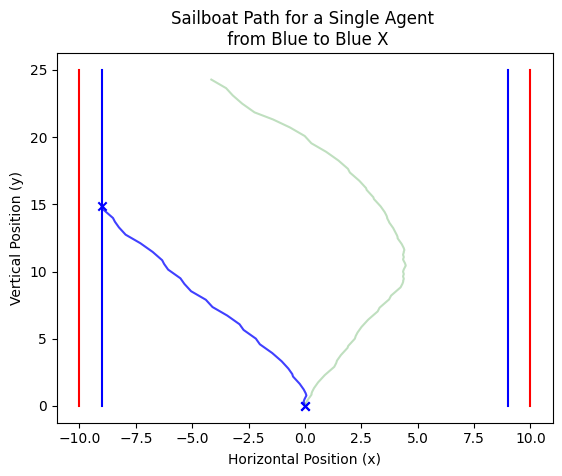

In [14]:


# Re-applies actions made by agent to observe path
goal = 9
for i in range(0,2):
    x = 0
    y = 0
    plt.scatter(x,y,marker='x', color='b')
    angle=0

    x_list=[]
    y_list=[]
    x_min = 0
    for j in range(0,100):
        action = np.random.randint(0,2)
        a = [-0.1,0.1][action]
        angle+=a
        #print(x,"|", y, "|", angle)
        x += np.round((vel(angle + a) * np.sin(angle + a)),4) # Round x to 2dp
        y += np.round((vel(angle + a) * np.cos(angle + a)),4) # Round y to 2dp
        if x < x_min:
            print("------------------")
            print(x)
            x_min = x

        x_list.append(x)
        y_list.append(y)
        if np.abs(x)>=10:
            break
        elif np.abs(y)>=24:
            break
        elif np.abs(y)<0:
            break
        elif np.abs(x)>goal:
            break

    if np.abs(x_list[-1])>=10:
        plt.plot(x_list,y_list,'r',alpha=0.1)
    elif np.abs(y_list[-1])>=24:
        plt.plot(x_list,y_list,'g',alpha=0.25)
    elif np.abs(y_list[-1])<0:
        plt.plot(x_list,y_list,'r',alpha=0.1)
    elif np.abs(x_list[-1])>goal:
        plt.scatter(x_list[-1],y_list[-1],marker='x', color='b')
        plt.plot(x_list,y_list,'b',alpha=0.75)  
        print(x,"-",y,"-",angle)
    else:
        plt.plot(x_list,y_list,'k',alpha=0.1)
        
    
    #print(x,"-",y,"-",angle)

plt.plot([goal,goal],[0,25],'b')
plt.plot([-goal,-goal],[0,25],'b')
plt.plot([10,10],[0,25],'r')
plt.plot([-10,-10],[0,25],'r')
plt.title("Sailboat Path for a Single Agent \n from Blue to Blue X")
plt.xlabel("Horizontal Position (x)")
plt.ylabel("Vertical Position (y)")
plt.show()


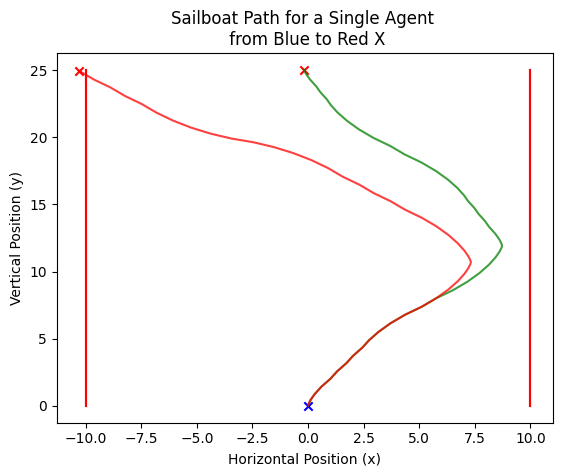

In [15]:
# Re-applies actions made by agent to observe path
plt.scatter(0,0,marker='x', color='b')
training_policies = [
    [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1]



]

for action_list in training_policies:
    
    x = 0
    y = 0
    angle = 0
    x_list=[]
    y_list=[]
    for action in action_list:
        a = [-0.1,0.1][action]
        
        #print(x,"|", y, "|", angle)
        x += np.round((vel(angle + a) * np.sin(angle + a)),4) # Round x to 2dp
        y += np.round((vel(angle + a) * np.cos(angle + a)),4) # Round y to 2dp
        angle=np.around(angle+a,1)
        # if (x > 3)&(x<5):
        #     print("---")
        #     print("{:0.4f}".format(x),"|", "{:0.4f}".format(y), "|", "{:0.1f}".format(angle))
        x_list.append(x)
        y_list.append(y)

    if np.abs(x_list[-1])>=10:
        plt.plot(x_list,y_list,'r',alpha=0.75)
    elif np.abs(y_list[-1])>=24:
        plt.plot(x_list,y_list,'g',alpha=0.75)
    elif np.abs(y_list[-1])<0:
        plt.plot(x_list,y_list,'r',alpha=0.75)
    else:
        plt.plot(x_list,y_list,'k',alpha=0.75)
        
    plt.scatter(x_list[-1],y_list[-1],marker='x', color='r')
    plt.plot([10,10],[0,25],'r')
    plt.plot([-10,-10],[0,25],'r')
    plt.title("Sailboat Path for a Single Agent \n from Blue to Red X")
    plt.xlabel("Horizontal Position (x)")
    plt.ylabel("Vertical Position (y)")
plt.show()
#print(x,"-",y,"-",angle)